In [8]:
import lib
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import skimage

In [2]:
labelizer = lib.Labelizer()

In [3]:
train, test = lib.load_base_datasets()
train = lib.rgb2lab_dataset(train)
train = lib.split_l_and_ab_dataset(train)
train = lib.quantize_dataset(train)
train = labelizer.label_dataset(train)
next(iter(train))[1]

labelizer.last_label

Found 33062 files.
Using 26450 files for training.
Using 6612 files for validation.


2024-11-27 14:35:53.736347: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


94

In [4]:
test = lib.rgb2lab_dataset(test)
test = lib.split_l_and_ab_dataset(test)
test = lib.quantize_dataset(test)
test = labelizer.label_dataset(test)

labelizer.last_label


94

In [ ]:
abs = np.array([[labelizer.ab_pixel_to_label(np.array([(a//10)*10 + 5, (b//10)*10 + 5]), add=False) for b in range(-128, 128)] for a in range(-128,128)])

In [36]:
rainbow_abs = [[skimage.color.lab2rgb(np.array([[[50., float((a//10)*10 + 5), float((b//10)*10 + 5)]]]))[0,0] if labelizer.ab_pixel_to_label(np.array([(a//10)*10 + 5, (b//10)*10 + 5]), add=False) != -1 else np.array([0, 0, 0]) for b in range(-128,128)] for a in range(-128,128)]

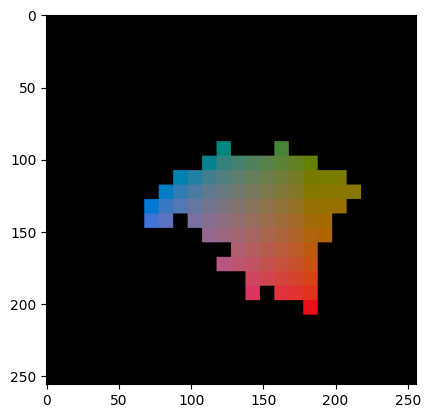

In [37]:
plt.imshow(rainbow_abs)